In [37]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");

v2.1


In [3]:
DT, v0, DR, N, Lx, Ly, ϕa, ϕp = (1.0, 20.0, 1.0, 100, 2.0, 0.5, 0.3, 0.6);
T = 2.0
sim_name = "sim_run_2"
save_interval = 0.001
param = new_sim_param(DT, v0, DR, N, Lx, Ly, ϕa, ϕp; T = T, name = sim_name, save_interval = save_interval, save_on = true);
#load_and_run_sim(param)
t_saves, η_saves = load_compress_sim(param)
t, η = t_saves[end], η_saves[end]

fast load


(2.000000018026596, [0.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … -1.0 0.0; … ; 0.0 0.0 … -1.0 0.0; -1.0 -1.0 … -1.0 0.0])

In [14]:
DT, v0, DR, N, Lx, Ly, ϕa, ϕp = (1.0, 20.0, 1.0, 25, 2.0, 0.5, 0.5, 0.3);
T = 10.
sim_name = "sim_run_3"
save_interval = 0.1
param = new_sim_param(DT, v0, DR, N, Lx, Ly, ϕa, ϕp; T = T, name = sim_name, save_interval = save_interval, save_on = true);
#load_and_run_sim(param)
t_saves, η_saves = load_compress_sim(param)
t, η = t_saves[end], η_saves[end]

fast load


(10.000007019735383, [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0;;; 0.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … 0.0 -1.0; 1.0 -1.0 … -1.0 -1.0])

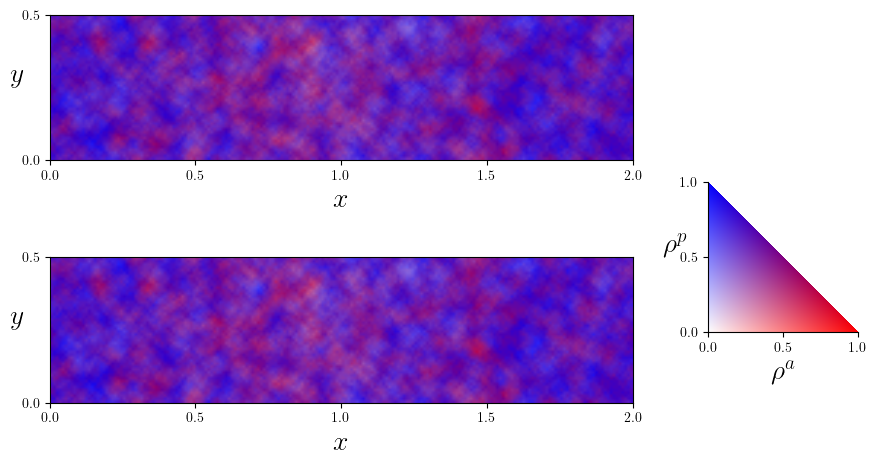

In [39]:
#create image    
    @unpack DT, v0, DR, N, Lx,Ly, ϕa, ϕp, T , name, N₁, N₂, save_interval, save_on = param
    ϵ = 0.1
    f = local_average(η, ϵ, N, N₁, N₂)
    # ρa, ρp, m = local_average_1d(η, ϵ, N, N₁, N₂)

    rgb_image = rho_to_rgb(f);
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, axs = plt.subplots(2, 1, figsize=(10,5))
# add image
    for ax in axs
        ax.imshow(rgb_image; extent = [0,Lx,0,Ly], interpolation = "bilinear")
        ax.get_xaxis().set_ticks(0:0.5:Lx)
        ax.get_yaxis().set_ticks(0:0.5:Ly)
        ax.set_xlabel(L"x", fontsize = 20)
        ax.set_ylabel(L"y",fontsize = 20, rotation = 0)
    end

    fig.tight_layout()

# add colour bars
    fig.subplots_adjust(right=0.6)
    cbar_ax = fig.add_axes([0.65, 0.3, 0.2, 0.3])

    ax = cbar_ax

    Δx = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δx:Δx:1, y in Δx:Δx:1, i in 1:3 ]  

    rgb_image = rho_to_rgb(cbar_f );

    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 0)
#
display(fig)

In [36]:
#rgb_image = rho_to_rgb(f) #??? 
maximum(sum(f;dims = 3))

1.0

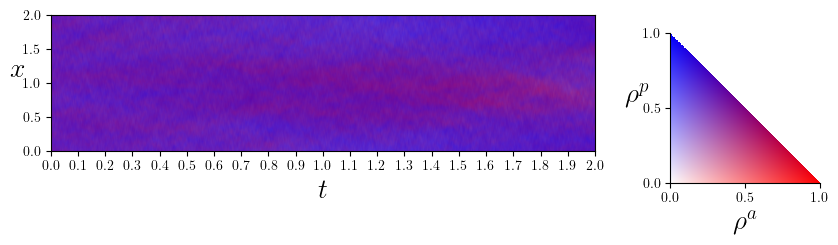

In [31]:
# create image
    @unpack DT, v0, DR, N, Lx,Ly, ϕa, ϕp, T , name, N₁, N₂, save_interval, save_on = param
    ϵ = 0.2
    ρa, ρp, m = local_average_timeseries(η_saves, ϵ, N, N₁, N₂)
    rgb_image = rho_to_rgb(ρa, ρp, m; type = "rho" );
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
# add image
    ax.imshow(rgb_image; extent = [0,t_saves[end],0,Lx], interpolation = "bilinear")
    ax.get_xaxis().set_ticks(0:0.1:round(t_saves[end]))
    ax.get_yaxis().set_ticks(0:0.5:Lx)
    ax.set_xlabel(L"t", fontsize = 20)
    ax.set_ylabel(L"x",fontsize = 20, rotation = 0)
    ax.set_aspect(t_saves[end]/Lx/4)
    fig.tight_layout()

# add colour bars
    fig.subplots_adjust(right=0.6)
    cbar_ax = fig.add_axes([0.65, 0.3, 0.2, 0.3])

    ax = cbar_ax

    Δx = 0.001
    cbar_ρa = [ x*(x+y≤ 1) for x in Δx:Δx:1, y in Δx:Δx:1 ] 
    cbar_ρp = [ y*(x+y≤1) for x in Δx:Δx:1, y in Δx:Δx:1 ] 
    cbar_m  = [ 0 for x in Δx:Δx:1, y in Δx:Δx:1 ] 

    rgb_image = rho_to_rgb(cbar_ρa, cbar_ρp, cbar_m; type = "rho" );

    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 0)
#
display(fig)


In [28]:
using LinearAlgebra
function self_diff(ρ::Float64;logtol = 1e-10, γ = 0.0)
    α::Float64= π/2 -1;
    if ρ ≤  0.
        ρ = 0.
    elseif ρ>1.
        ρ = 1.
    end
    return ( 1-ρ).*( α*(2*α-1)/(2*α+1)*ρ^2 - α*ρ +1)+γ
end

function self_diff_prime(ρ::Float64)
    α::Float64= π/2 -1;
    return - ( α*(2*α-1)/(2*α+1)*ρ.^2 - α*ρ .+1) + ( -ρ .+1)*(2*α*(2*α-1)/(2*α+1)*ρ - α );
end

function pm_lin_pert_sim(param)
    @unpack DT, v0, DR, N, Lx,Ly, ϕa, ϕp, T , name, N₁, N₂, save_interval, save_on = param
    ω = 2*π/Lx;
    Pe = v0;
    ϕ  = ϕa + ϕp;
    ϕ0 = 1- ϕ;
    ds = self_diff(ϕ);
    dsp = self_diff_prime(ϕ);
    DD = (1-ds)/ϕ
    s = DD - 1
    W = [-ω^2             0          -im*ω*Pe*ϕ0; 
        -ω^2*ϕa*DD      -ω^2*ds     -im*ω*Pe*(ϕa*s+ds); 
        -im*ω*Pe*ϕa*dsp -im*ω*Pe*ds -ω^2*ds-2         ]
    values,vectors = eigen(W)
    return ω, values[3], vectors[:,3]
end

DT, v0, DR, N, Lx, Ly, ϕa, ϕp = (1.0, 20.0, 1.0, 25, 2.0, 0.5, 0.3, 0.6);
T = 10.
sim_name = "sim_run_3"
save_interval = 0.1
param = new_sim_param(DT, v0, DR, N, Lx, Ly, ϕa, ϕp; T = T, name = sim_name, save_interval = save_interval, save_on = true);

ω, value, vector = pm_lin_pert_sim(param)


(3.141592653589793, 0.8788467078709905 - 1.650877144709497im, ComplexF64[0.2901088026530355 - 0.20230625476301084im, 0.7072543200436598 + 0.0im, 0.42230377593735174 + 0.44312516235892185im])